# Analisi sulla felicità

## Contesto

## Richieste e Obiettivi

## Raccolta dei dati

I dati utilizzati sono stati presi in [world happyness](https://www.kaggle.com/unsdsn/world-happiness), in [suicide rates](https://ourworldindata.org/suicide).
Durante la pulizia iniziale dei dati sono state sistemate delle informazioni riguardanti dati non esistenti ed alcuni errori di conversione, sono state sistemate le etichette per facilitare i vari merge tra dataset provenienti da sorgenti diverse, che avevano bisogno di una correzione leggera.

## Esplorazione dei dati

In [11]:
import pandas as pd

In [62]:
import seaborn as sns

In [12]:
dataset = pd.read_csv("dati/worldHappyness/2015.csv")

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   rank               158 non-null    int64  
 3   Score              158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   GDP                158 non-null    float64
 6   Family             158 non-null    float64
 7   life_expectancy    158 non-null    float64
 8   FreedomOflife      158 non-null    float64
 9   corruption         158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
 12  year               158 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 16.2+ KB


In [65]:
dataset.count()

Country              158
Region               158
rank                 158
Score                158
Standard_Error       158
GDP                  158
Family               158
life_expectancy      158
FreedomOflife        158
corruption           158
Generosity           158
Dystopia_Residual    158
year                 158
dtype: int64

In [47]:
suicides = pd.read_csv("dati/worldHappyness/suicidecorretti.csv")

In [74]:
suicides = suicides.drop("Code",1)

In [75]:
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                1132 non-null   object 
 1   year                   1132 non-null   int64  
 2   Age-standardized-Rate  1132 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.7+ KB


In [3]:
import matplotlib.pyplot as plt

In [57]:
dataset.head()

,Country,Region,rank,Score,Standard_Error,GDP,Family,life_expectancy,FreedomOflife,corruption,Generosity,Dystopia_Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [77]:
dataset.value_counts()

Country       Region                       rank  Score  Standard_Error  GDP      Family   life_expectancy  FreedomOflife  corruption  Generosity  Dystopia_Residual  year
Zimbabwe      Sub-Saharan Africa           115   4.610  0.04290         0.27100  1.03276  0.33475          0.25861        0.08079     0.18987     2.44191            2015    1
Germany       Western Europe               26    6.750  0.01848         1.32792  1.29937  0.89186          0.61477        0.21843     0.28214     2.11569            2015    1
Hong Kong     Eastern Asia                 72    5.474  0.05051         1.38604  1.05818  1.01328          0.59608        0.37124     0.39478     0.65429            2015    1
Honduras      Latin America and Caribbean  105   4.788  0.05648         0.59532  0.95348  0.69510          0.40148        0.06825     0.23027     1.84408            2015    1
Haiti         Latin America and Caribbean  119   4.518  0.07331         0.26673  0.74302  0.38847          0.24425        0.17175 

(array([ 3., 10., 13., 25., 28., 12., 26., 14., 12., 15.]),
 array([2.839 , 3.3138, 3.7886, 4.2634, 4.7382, 5.213 , 5.6878, 6.1626,
        6.6374, 7.1122, 7.587 ]),
 <BarContainer object of 10 artists>)

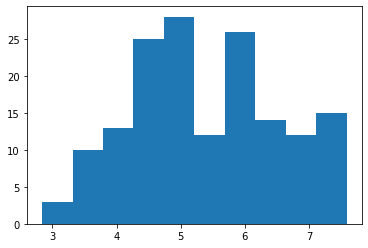

In [59]:
plt.hist(dataset["Score"])

<AxesSubplot:xlabel='Score', ylabel='Density'>

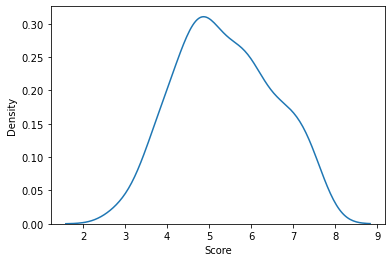

In [64]:
sns.kdeplot(dataset['Score'])

In [67]:
suicides.head()

,Country,Code,year,Age-standardized-Rate
0,Afghanistan,AFG,2015,9.447661
1,Afghanistan,AFG,2016,9.346731
2,Afghanistan,AFG,2017,9.319114
3,Afghanistan,AFG,2018,9.251600
4,Afghanistan,AFG,2019,9.251600


In [76]:
suicides.count()

Country                  1132
year                     1132
Age-standardized-Rate    1132
dtype: int64

In [79]:
suicides["year"].value_counts()

2019    231
2015    231
2018    226
2017    222
2016    222
Name: year, dtype: int64

In [50]:
suicides2015 = suicides[suicides["year"]==2015].dropna().drop_duplicates(subset = "Country")

E' stato utilizzato drop_duplicates sull'attributo **Country** per l'eliminazione di possibili ripetizioni in base allo stato, dato che parti del dataset dei suicidi sono sullo stesso stato ma 

In [51]:
suicides2015["index"] = range(1, len(suicides2015) + 1)

In [52]:
suicides2015.head()

,Country,Code,year,Age-standardized-Rate,index
0,Afghanistan,AFG,2015,9.447661,1
5,Albania,ALB,2015,5.196816,2
10,Algeria,DZA,2015,4.349270,3
14,American Samoa,ASM,2015,6.663811,4
24,Andorra,AND,2015,8.290929,5


In [53]:
full2015 = pd.merge(dataset, suicides2015, on=["year","Country"])

In [54]:
full2015.tail()

,Country,Region,rank,Score,Standard_Error,GDP,Family,life_expectancy,FreedomOflife,corruption,Generosity,Dystopia_Residual,year,Code,Age-standardized-Rate,index
145,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015,RWA,11.505365,146
146,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015,BEN,11.666197,20
147,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015,SYR,3.008581,172
148,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015,BDI,13.094205,30
149,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015,TGO,12.723625,178


## Relazioni tra le feature

<AxesSubplot:xlabel='rank'>

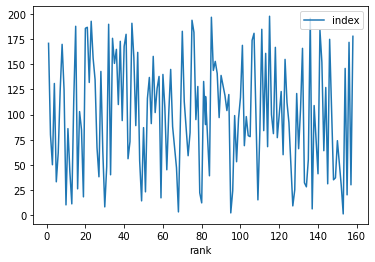

In [55]:
full2015.plot(x="rank",y="index")

<AxesSubplot:xlabel='rank'>

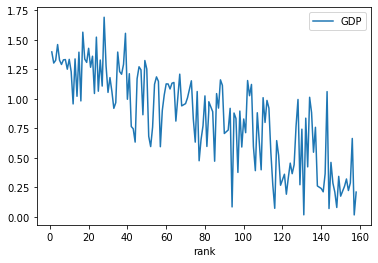

In [56]:
full2015.plot(x="rank",y="GDP")